In [1]:
import os, sys
from pathlib import Path


import numpy as np
from Bio import SeqIO
from Bio.Seq import Seq

import itertools

In [2]:
from matplotlib import pyplot as plt

In [3]:
print(sys.executable)

/opt/local/bin/python3.8


## Handling files

In [4]:
os.getcwd()

'/Users/ivan/Library/CloudStorage/Dropbox/z_olimpics/fall_school_2025/zecamp_numerical_workshop/ijunier_notebooks'

In [5]:
data_root = Path('../data/')

In [6]:
for fasta_file in data_root.rglob('*.fna'):
    print(fasta_file)

../data/GCF_003586045.1_E.coli_isolate/GCF_003586045.1_E.coli_isolate_genomic.fna
../data/GCF_900618295.1_ecoli019/GCF_900618295.1_ecoli019_genomic.fna
../data/GCF_041870075.1_Escherichia_coli_M2021-10044802_2_E/GCF_041870075.1_Escherichia_coli_M2021-10044802_2_E_genomic.fna
../data/GCF_901733115.1_Escherichia_coli_MAD/GCF_901733115.1_Escherichia_coli_MAD_genomic.fna
../data/GCF_000981485.1_EcoliK12AG100/GCF_000981485.1_EcoliK12AG100_genomic.fna
../data/GCF_000273425.1_Esch_coli_MG12655_V1/GCF_000273425.1_Esch_coli_MG12655_V1_genomic.fna
../data/GCF_000269645.1_PB_Esch_coli_MG12655_V1/GCF_000269645.1_PB_Esch_coli_MG12655_V1_genomic.fna
../data/GCF_900166955.1_E._coli_KV7/GCF_900166955.1_E._coli_KV7_genomic.fna
../data/GCF_900096795.1_Ecoli_AG100_Sample3_Doxycycline_Assembly/GCF_900096795.1_Ecoli_AG100_Sample3_Doxycycline_Assembly_genomic.fna
../data/GCF_900096845.1_Ecoli_AG100_Sample3_M9_Assembly/GCF_900096845.1_Ecoli_AG100_Sample3_M9_Assembly_genomic.fna
../data/GCF_042259155.1_RUNB_E

In [7]:
fasta_files=[fasta_file for fasta_file in data_root.rglob('*.fna')]

In [8]:
genome_sequences=[]
idgenome2seq={}
for file in fasta_files:
    record = next(SeqIO.parse(file, 'fasta'))
    print('Sequence id: '+record.id+', which is %d bp long'%len(record.seq))    
    genome_sequences.append(record.seq)
    idgenome2seq[record.id]=record.seq

Sequence id: NZ_CP019953.1, which is 5108794 bp long
Sequence id: NZ_LR130532.1, which is 5009390 bp long
Sequence id: NZ_CP163451.1, which is 5229313 bp long
Sequence id: NZ_LR595691.1, which is 4747851 bp long
Sequence id: NZ_LN832404.1, which is 4638126 bp long
Sequence id: NZ_AKVX01000001.1, which is 4638970 bp long
Sequence id: NZ_AKBV01000001.1, which is 4638970 bp long
Sequence id: NZ_LT795502.1, which is 4997480 bp long
Sequence id: NZ_LT615378.1, which is 4638126 bp long
Sequence id: NZ_LT615377.1, which is 4638126 bp long
Sequence id: NZ_CP170128.1, which is 4606468 bp long


In [9]:
print('%d genomes'%len(genome_sequences))

11 genomes


In [10]:
# useful list
alphabet=['A', 'T', 'G', 'C']

## GC content (the simplest pattern analysis one can think of)

#### Second parity (empirical) rule, discovered by Erwin Chargaff 

The percentages of complementary bases are roughly equal: A $\simeq$ T and G $\simeq$ C, even though each strand individually is single-stranded.

In [11]:
# A concise way of computing the number of 'G' in a given sequence
# using numpy arrays (very powerful)
print('A boolen vector: ', np.array(genome_sequences[0]) == 'G')
print('for which we compute the mean: ', np.mean(np.array(genome_sequences[0]) == 'G'))


A boolen vector:  [False  True False ... False False False]
for which we compute the mean:  0.25272794322887165


In [12]:
print('id_genomes', 'A', 'T', 'G', 'C', 'GC', sep='\t')
for id, seq in idgenome2seq.items():
    
    content={letter:np.mean(np.array(seq) == letter)
             for letter in ['A','T','G','C']}
    print(id,
          '%.3f'%content['A'], '%.3f'%content['T'],
          '%.3f'%content['G'], '%.3f'%content['C'],
          '%.3f'%(content['G']+content['C']), sep='\t')
    

id_genomes	A	T	G	C	GC
NZ_CP019953.1	0.247	0.247	0.253	0.254	0.506
NZ_LR130532.1	0.246	0.246	0.254	0.255	0.509
NZ_CP163451.1	0.247	0.247	0.253	0.253	0.506
NZ_LR595691.1	0.247	0.247	0.253	0.254	0.506
NZ_LN832404.1	0.246	0.246	0.254	0.254	0.508
NZ_AKVX01000001.1	0.246	0.246	0.254	0.254	0.508
NZ_AKBV01000001.1	0.246	0.246	0.254	0.254	0.508
NZ_LT795502.1	0.246	0.246	0.254	0.253	0.507
NZ_LT615378.1	0.246	0.246	0.254	0.254	0.508
NZ_LT615377.1	0.246	0.246	0.254	0.254	0.508
NZ_CP170128.1	0.245	0.245	0.254	0.255	0.510


#### Starting to build patern frequencies

In [13]:
frequencies=dict()

In [14]:
for letter in alphabet:
    frequencies[letter]=np.mean(np.array(seq) == letter)

## Doublet statistics

- GC content is a singlet statistics.
- 'AT' is an example of doublet.
- There are $4^2=16$ possible doublets.

Analysis of a single doublet

In [15]:
doublet='AT'

seq = np.array(genome_sequences[0])
t_doublet=(seq[:-2] == doublet[0]) & (seq[1:-1] == doublet[1])

print('%s frequency: '%doublet, np.mean(t_doublet))

AT frequency:  0.0669422438807452


Iterating over all possible doublets

In [16]:
seq = np.array(genome_sequences[0])

print('Frequencies')
for it in itertools.product(alphabet, repeat=2):
    doublet=''.join(it)    
    t_doublet=(seq[:-2] == doublet[0]) & (seq[1:-1] == doublet[1])
    frequencies[doublet]=np.mean(t_doublet)
    print('%s: %.4f'%(doublet,frequencies[doublet]))
    

Frequencies
AA: 0.0729
AT: 0.0669
AG: 0.0514
AC: 0.0555
TA: 0.0460
TT: 0.0733
TG: 0.0696
TC: 0.0579
GA: 0.0577
GT: 0.0552
GG: 0.0584
GC: 0.0814
CA: 0.0702
CT: 0.0513
CG: 0.0734
CC: 0.0589


Are these results expected?

In [17]:
seq = np.array(genome_sequences[0])

print('Occurrences')
print('measured\texpected\tratio')
for it in itertools.product(alphabet, repeat=2):
    doublet=''.join(it)    
    t_doublet=(seq[:-2] == doublet[0]) & (seq[1:-1] == doublet[1])
    occ=np.sum(t_doublet)
    print('%s: %d'%(doublet,occ),end='\t')

    # expected: Poisson process
    la=len(seq)*frequencies[doublet[0]]*frequencies[doublet[1]] 
    print('%d \u00B1 %d'%(la, np.sqrt(la)),end='\t')

    # ratio measured / expected
    print('%.2f'%(occ/la))


    
    

Occurrences
measured	expected	ratio
AA: 372255	307712 ± 554	1.21
AT: 341994	307157 ± 554	1.11
AG: 262613	318748 ± 564	0.82
AC: 283626	320190 ± 565	0.89
TA: 234987	307157 ± 554	0.77
TT: 374541	306604 ± 553	1.22
TG: 355341	318174 ± 564	1.12
TC: 295984	319613 ± 565	0.93
GA: 294572	318748 ± 564	0.92
GT: 282202	318174 ± 564	0.89
GG: 298338	330181 ± 574	0.90
GC: 416023	331674 ± 575	1.25
CA: 358673	320190 ± 565	1.12
CT: 262117	319613 ± 565	0.82
CG: 374843	331674 ± 575	1.13
CC: 300683	333174 ± 577	0.90


Checking the validity of the analysis by reshuffling the genome sequence

In [18]:
random_seq = np.random.permutation(seq) # this keeps the alphabet content identical

print('Occurrences')
print('measured\texpected\tratio')
for it in itertools.product(alphabet, repeat=2):
    doublet=''.join(it)    
    t_doublet=(random_seq[:-2] == doublet[0]) & (random_seq[1:-1] == doublet[1])
    occ=np.sum(t_doublet)
    print('%s: %d'%(doublet,occ),end='\t')

    # expected: Poisson process
    la=len(seq)*frequencies[doublet[0]]*frequencies[doublet[1]] 
    print('%d \u00B1 %d'%(la, np.sqrt(la)),end='\t')

    # ratio measured / expected
    print('%.2f'%(occ/la))



Occurrences
measured	expected	ratio
AA: 311177	307712 ± 554	1.01
AT: 310424	307157 ± 554	1.01
AG: 318356	318748 ± 564	1.00
AC: 320530	320190 ± 565	1.00
TA: 311044	307157 ± 554	1.01
TT: 310856	306604 ± 553	1.01
TG: 319263	318174 ± 564	1.00
TC: 319691	319613 ± 565	1.00
GA: 318977	318748 ± 564	1.00
GT: 318549	318174 ± 564	1.00
GG: 326200	330181 ± 574	0.99
GC: 327408	331674 ± 575	0.99
CA: 319290	320190 ± 565	1.00
CT: 321024	319613 ± 565	1.00
CG: 327315	331674 ± 575	0.99
CC: 328688	333174 ± 577	0.99


Conclusion: genomes are not random sequences

## 3-uplets statistics

- There are $4^3=64$ possible triplets.

### Objective: sort the 3-uplets according to their ratio occurrence.

In [19]:
uplet_occurencies=dict()
uplet_ratios=dict()

In [20]:
seq = np.array(genome_sequences[0])

for it in itertools.product(alphabet, repeat=3):
    uplet=''.join(it)
    t_uplet=(seq[:-2] == uplet[0]) & (seq[1:-1] == uplet[1]) & (seq[2:] == uplet[2])
    uplet_occurencies[uplet]=np.sum(t_uplet)

    frequencies[uplet]=np.mean(t_uplet)


    freq_random=frequencies[uplet[:2]]*frequencies[uplet[2]]
    uplet_ratios[uplet]=uplet_occurencies[uplet]/(freq_random*len(seq))

    

In [21]:
ratio_sorted_3uplets=sorted(uplet_occurencies.keys(), key=lambda uplet: uplet_ratios[uplet])

['CTA', 'TAG', 'GAG', 'CCC', 'GGG', 'CTC', 'AAG', 'TGT', 'CCT', 'ACT', 'GAC', 'CAC', 'CGA', 'TTA', 'GTC', 'TCC', 'AGG', 'GTA', 'ATA', 'TCT', 'AGT', 'GCT', 'GGA', 'CGT', 'TTG', 'CAA', 'ACA', 'AAC', 'GCC', 'ATG', 'CAT', 'AGA', 'TAC', 'TTC', 'CGG', 'AAT', 'GTG', 'TCG', 'GCA', 'TGG', 'TGA', 'ATC', 'CTT', 'ATT', 'ACG', 'GGT', 'ACC', 'TGC', 'GCG', 'TAT', 'CCG', 'CAG', 'CCA', 'GAA', 'TCA', 'CGC', 'GAT', 'GTT', 'GGC', 'AGC', 'AAA', 'TAA', 'TTT', 'CTG']
[['CTA', 'TAG', 'GAG', 'CCC', 'GGG', 'CTC', 'AAG', 'TGT', 'CCT', 'ACT', 'GAC', 'CAC', 'CGA', 'TTA', 'GTC', 'TCC', 'AGG', 'GTA', 'ATA', 'TCT', 'AGT', 'GCT', 'GGA', 'CGT', 'TTG', 'CAA', 'ACA', 'AAC', 'GCC', 'ATG', 'CAT', 'AGA', 'TAC', 'TTC', 'CGG', 'AAT', 'GTG', 'TCG', 'GCA', 'TGG', 'TGA', 'ATC', 'CTT', 'ATT', 'ACG', 'GGT', 'ACC', 'TGC', 'GCG', 'TAT', 'CCG', 'CAG', 'CCA', 'GAA', 'TCA', 'CGC', 'GAT', 'GTT', 'GGC', 'AGC', 'AAA', 'TAA', 'TTT', 'CTG']]


In [ ]:
print(ratio_sorted_3uplets)
print([Seq(u).reverse_complement() for u in ratio_sorted_3uplets])

### Some info:
- 'TAG' is a stop codon

## 4-uplets statistics

- There are $4^4    =256$ possible triplets.

In [22]:
seq = np.array(genome_sequences[0])

uplet_length=4

uplet_occurencies=dict()
for it in itertools.product(alphabet, repeat=uplet_length):
    uplet=''.join(it)

    t_uplet=(seq[:-(uplet_length-1)] == uplet[0])
    for i in range(1,uplet_length):
        if i < (uplet_length-1):
            t_uplet&=(seq[i:-(uplet_length-1)+i] == uplet[i])
        else:
            t_uplet&=(seq[i:] == uplet[i])

    uplet_occurencies[uplet]=np.sum(t_uplet)
    freq_random=frequencies[uplet[:2]]*frequencies[uplet[2:]]
    uplet_ratios[uplet]=uplet_occurencies[uplet]/(freq_random*len(seq))

In [23]:
ratio_sorted_4uplets=sorted([u for u in uplet_occurencies.keys() if len(u)==4],
                            key=lambda u: uplet_ratios[u])
print(ratio_sorted_4uplets)

['CTAG', 'CCTA', 'TAGG', 'TTAG', 'CTAA', 'TCTA', 'TAGA', 'GAGG', 'CCTC', 'ACTA', 'TAGT', 'CGAG', 'CAAG', 'GTCC', 'CCCC', 'GGAC', 'GGGG', 'CTTG', 'CTAT', 'TGTG', 'ATAG', 'CTCG', 'CACA', 'GAGC', 'TAGC', 'GCTA', 'GCTC', 'ACTC', 'TTGG', 'GAGT', 'CCAA', 'CATG', 'CTAC', 'AGGG', 'CCCT', 'CCTT', 'CACG', 'CGTG', 'AAGT', 'ACTT', 'AGTC', 'AAGG', 'GTAG', 'GGGC', 'CCCA', 'TGGG', 'GCTT', 'GCCC', 'GACT', 'CTCC', 'GGAG', 'AAGC', 'GACA', 'TGAG', 'TCCC', 'TGTC', 'TACA', 'TGTA', 'CTCA', 'GGGA', 'CGAA', 'TCTC', 'GAGA', 'TTCG', 'GGCC', 'AATT', 'ACAC', 'GTAT', 'GTGT', 'ATAC', 'GTCT', 'ACCC', 'AGAC', 'GGGT', 'AGTG', 'CCCG', 'ATGT', 'TCCT', 'CGGG', 'AGGA', 'CACT', 'ACAT', 'GTAC', 'ATGC', 'GCAT', 'GTGC', 'GGTC', 'AGGC', 'TTAA', 'GCAC', 'GCCT', 'AAGA', 'TCTT', 'TCCG', 'GACC', 'TGCA', 'ACAA', 'AGAG', 'TTGT', 'CTCT', 'CGAC', 'CGGA', 'GTCG', 'TACG', 'CGTA', 'TATG', 'CTTA', 'TGGA', 'TAAG', 'TCCA', 'CGTC', 'AATG', 'CATA', 'AACT', 'CATT', 'AACA', 'GACG', 'AGTT', 'TGTT', 'ATAT', 'CAAT', 'ACGA', 'GCAA', 'ATTG', 'CGTT',

### Some info:
- 'CTAG' is a restriction recognition site (a sequence recognized by [RM system](https://en.wikipedia.org/wiki/Restriction_modification_system))
- 'TAG' is a stop codon
- 'TAA' is a stop codon

## 6-uplets statistics

- There are $4^6    =4096$ possible triplets.

In [24]:
seq = np.array(genome_sequences[0])

uplet_length=6

uplet_occurencies=dict()
for nit, it in enumerate([it for it in itertools.product(alphabet, repeat=uplet_length)]):
    print(nit, end='\r')
    uplet=''.join(it)

    t_uplet=(seq[:-(uplet_length-1)] == uplet[0])
    for i in range(1,uplet_length):
        if i < (uplet_length-1):
            t_uplet&=(seq[i:-(uplet_length-1)+i] == uplet[i])
        else:
            t_uplet&=(seq[i:] == uplet[i])

    uplet_occurencies[uplet]=np.sum(t_uplet)

    freq_random=frequencies[uplet[:3]]*frequencies[uplet[3:]]
    uplet_ratios[uplet]=uplet_occurencies[uplet]/(freq_random*len(seq))

In [25]:
ratio_sorted_6uplets=sorted([u for u in uplet_occurencies.keys() if len(u)==6],
                            key=lambda u: uplet_ratios[u])
print(ratio_sorted_6uplets)

['CCTAGG', 'CCTAGA', 'TCTAGG', 'TCTAGC', 'GCCTAG', 'GCTAGA', 'TCTAGA', 'GGCGCC', 'ACTAGG', 'CCTAGC', 'GCTAGG', 'ACTAGA', 'GTCTAG', 'CTAGGA', 'CTAGAC', 'CTAGGT', 'TCCTAG', 'CCTAGT', 'CTAGGC', 'TCTAGT', 'ACCTAG', 'CTAGAA', 'CTAGAT', 'GCTAGC', 'ACTAGC', 'CTAGCA', 'ATCTAG', 'GACTAG', 'CTCTAG', 'GCTAGT', 'TTCTAG', 'ACTAGT', 'GGCTAG', 'CTAGCT', 'CTAGGG', 'GGGCCC', 'TGCTAG', 'CTAGTC', 'TACTAG', 'CTAGAG', 'AACTAG', 'CACGTG', 'CTTGGA', 'TCCAAG', 'CGGCCG', 'AGCTAG', 'CCCTAG', 'CTAGCC', 'CTAGTT', 'CGCTAG', 'GCCGGC', 'CTAGCG', 'TCTAAG', 'CACTAG', 'CTTAGG', 'CTAGTA', 'CTTAGA', 'ATAGGA', 'CCTTGG', 'GAGACC', 'CTAGTG', 'GGTCTC', 'TTAGAC', 'TTAGGA', 'TCCTAT', 'CCAAGG', 'GTCTAA', 'CCTAAG', 'TTGGAA', 'TTCCAA', 'TCCTAA', 'TTAGGC', 'CCAAGT', 'TCTAAA', 'TCCAAA', 'TTTAGA', 'GCCTAA', 'TTTGGA', 'ACTTGG', 'TTGGAC', 'GTCCAA', 'ATCTAA', 'GCTTGG', 'TTAGAT', 'GGGACC', 'CCAAGC', 'GGTCCC', 'TTCTAA', 'TAGGAC', 'GGTCCT', 'TTAGAA', 'ATTGGA', 'TCTAAT', 'TCCAAT', 'TTTAGG', 'TCTTGG', 'CCTAAT', 'GTAGGA', 'AGGACC', 'AGGGCC',

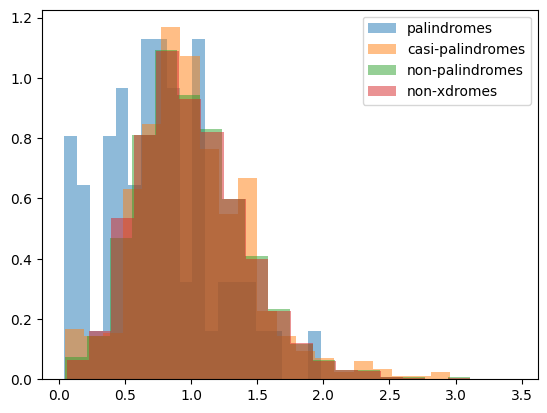

In [27]:
#plt.hist([uplet_ratios[u] for u in ratio_sorted_6uplets],bins=100,density=True,alpha=0.5);

# palindromes
palindromes = [u for u in ratio_sorted_6uplets if Seq(u).reverse_complement() == Seq(u)]
plt.hist([uplet_ratios[p] for p in palindromes],bins=20,density=True,alpha=0.5,label='palindromes');

# casi-palindromes
casi_palindromes = [u for u in ratio_sorted_6uplets if np.sum(np.array(Seq(u).reverse_complement()) != np.array(Seq(u))) ==2]
plt.hist([uplet_ratios[p] for p in casi_palindromes],bins=20,density=True,alpha=0.5,label='casi-palindromes');

# non-palindromes 
non_palindromes = [u for u in ratio_sorted_6uplets if u not in palindromes]
plt.hist([uplet_ratios[p] for p in non_palindromes],bins=20,density=True,alpha=0.5,label='non-palindromes')

# non-casi-palindromes 
non_xdromes = [u for u in ratio_sorted_6uplets if u not in palindromes and u not in casi_palindromes]
plt.hist([uplet_ratios[p] for p in non_xdromes],bins=20,density=True,alpha=0.5,label='non-xdromes');

plt.legend(loc=1)